Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [6]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [36]:
logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success':'count'}) \
    .rename(columns={'success':'success_count'}) \
    .sort_values('success_count', ascending = False) \
    .query('success_count == 41') \
    .client.sort_values().tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?



In [55]:
logs.query('success == True') \
    .platform.value_counts().idxmax()

'phone'

Какая платформа наиболее популярна среди премиумных клиентов?



In [61]:
df = user_data.merge(logs, how = 'inner', on = 'client')
df.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге
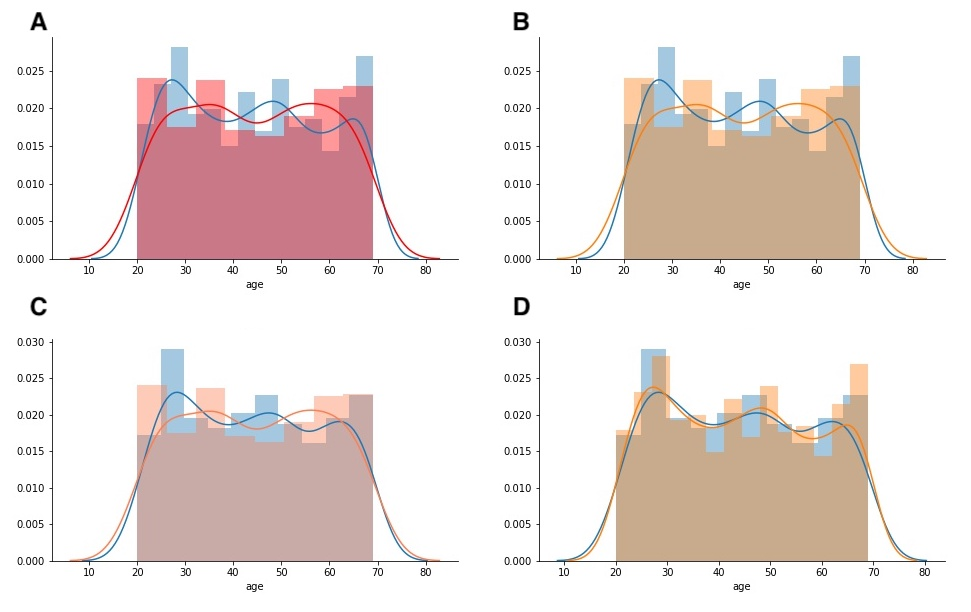

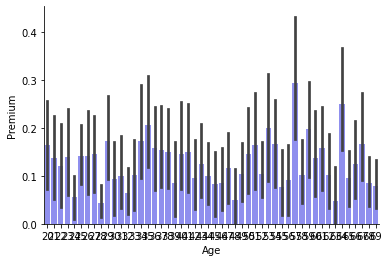

In [64]:
ax = sns.barplot(x='age', y='premium', data=df, color='blue', alpha=0.5) 
# надо в кавычки возвести x и y в 1-ой строке
ax.set(xlabel='Age', ylabel='Premium')
sns.despine()  # убрать часть рамки графика
plt.show()

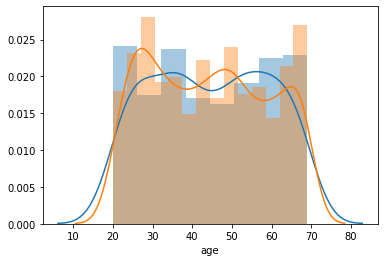

In [67]:
sns.distplot(df.query('premium == True').age)
sns.distplot(df.query('premium == False').age);

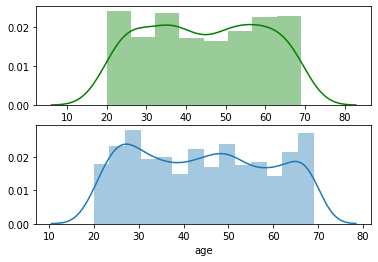

In [69]:
fig,ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(df.query('premium == True').age, ax=ax[0], color = 'green')
sns.distplot(df.query('premium == False').age, ax=ax[1]);

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

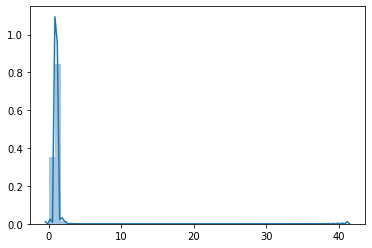

In [80]:
success_clients = df.groupby('client').agg({'success':'sum'})
sns.distplot(success_clients);
success_clients.success.value_counts()

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

sns.countplot – документация к типу графика
figsize – про размер графиков
Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

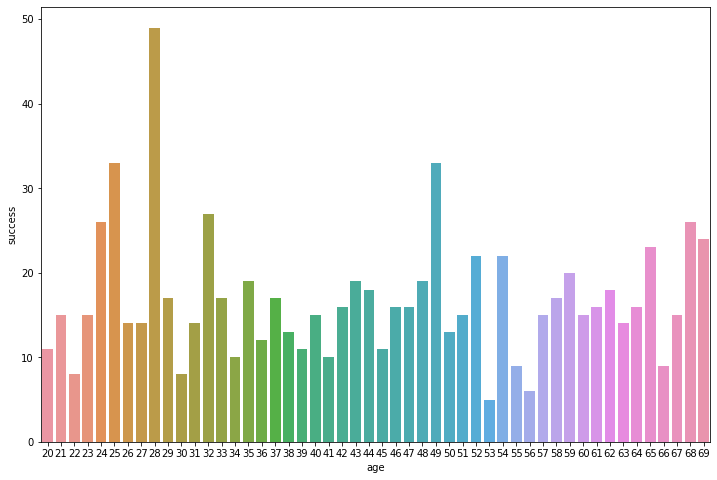

In [104]:
success_computer = df.query('platform == "computer"').groupby('age', as_index = False).agg({'success':'sum'})
# 1-ый вариант
plt.figure(figsize=(12,8))
sns.barplot(x = 'age', y = 'success', data = success_computer);

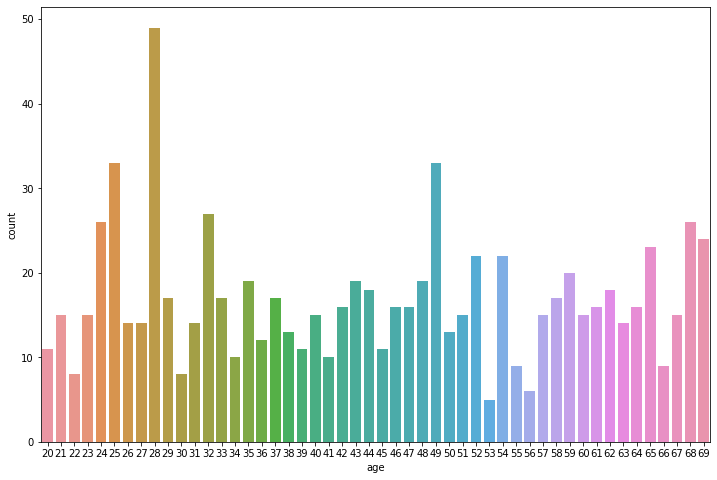

In [108]:
plt.figure(figsize=(12,8))
success_computer2 = df.query('platform == "computer" and success == True')
sns.countplot(success_computer2.age);
# 2-ой вариант